In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [1]:
#MUST BE RUN IN ORDER FOR A REDDIT INSTANCE TO BE MADE
#---------------------------------------------

import praw

reddit = praw.Reddit(
    client_id="CfN3p_JEL4a5KCh-meyEVw",
    client_secret="AZTvhYrIR5zi8gRIhUDqid44qUPgIQ",
    user_agent="analysis by u/EggsonEgged",
)
print(reddit.read_only)

True


In [ ]:
#THIS CODE IS NOT TO BE RUN, ONLY TO SHOW HOW DATA COLLECTION OCCURRED
#------------------------------------------------------------------------
import csv
import pandas as pd
from csv import DictWriter
data = pd.read_csv("subreddits.csv")

data_list=[]

def topscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.top(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def hotscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.hot(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def contscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.controversial(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def risescore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.rising(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def activeUserCount(name):
    subreddit = reddit.subreddit(""+name)
    return subreddit.active_user_count

#names of subreddits
count=0
header=['name','ratio_top','ratio_hot','ratio_cont','ratio_rise','user_count']
for subreddit in data.values:
    sample ={'name':"",
        'ratio_top':0,
        'ratio_hot':0,
        'ratio_cont':0,
        'ratio_rise':0,
        'user_count':0}
    sr = ""+subreddit.item(0)
    sample['name']=sr
    sample['ratio_top']=topscore(sr)
    sample['ratio_hot']=hotscore(sr)
    sample['ratio_cont']=contscore(sr)
    sample['ratio_rise']=risescore(sr)
    sample['user_count']=activeUserCount(sr)
    print("Data appended",count)
    count+=1
    #data_list.append(sample)
    with open(r'reddit.csv','a') as file:
        dictwriter=DictWriter(file,fieldnames=header)
        dictwriter.writerow(sample)
    file.close()
# df=pd.DataFrame(data_list)
# df.to_csv('reddit.csv')
  

In [55]:
sr="Cheap_Meals"
def topscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.top(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def hotscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.hot(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def contscore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.controversial(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def risescore(name):
    subreddit = reddit.subreddit(""+name)
    avgscore=0
    for submission in subreddit.rising(limit=100):
        avgscore+=submission.upvote_ratio
    return avgscore/100

def activeUserCount(name):
    subreddit = reddit.subreddit(""+name)
    return subreddit.active_user_count

def target(sr):
        subreddit=reddit.subreddit(""+sr)
        if subreddit.active_user_count > 2000:
            return 1
        else: return 0

print(sr,topscore(sr),hotscore(sr),contscore(sr),risescore(sr),activeUserCount(sr),target(sr))

Cheap_Meals 0.9672000000000002 0.8634000000000003 0.5497 0.21539999999999998 43 0


In [11]:
#DATA CLEANING PHASE
#------------------------------------------------------------------------
#import csv
import pandas as pd
reddit_data=pd.read_csv("reddit_data.csv")
def average(colname):
    sum_=0
    total=0
    for item in reddit_data[colname+'']:
        sum_+=item
        total+=1
    return sum_/total

colnames=list(reddit_data.columns.values)
avgs = []
for name in colnames[1:len(colnames)]:
    avgs.append(average(name))

adjust_colnames=colnames[1:len(colnames)]

targets=[]

t0=[] #ratio top
t1=[] #ratio hot
t2=[] #ratio cont
t3=[] #ratio rise
t4=[] #user count

def target(avg,col,index,t):
    for item in reddit_data[col[index]+'']:
        if item > avg:
            t.append(1)
        else:
            t.append(0)

target(avgs[0],adjust_colnames,0,t0)
target(avgs[1],adjust_colnames,1,t1)
target(avgs[2],adjust_colnames,2,t2)
target(avgs[3],adjust_colnames,3,t3)
target(avgs[4],adjust_colnames,4,t4)

#If the subreddit (row) has at least 3 features greater than the average, then that will qualify as "popular"
for i in range(len(t0)):
    if (t0[i]+t1[i]+t2[i]+t3[i]+t4[i])>=3:
        targets.append(1)
    else:
        targets.append(0)

c=0
for item in targets:
    if item==1:
        c+=1
print("number of 1's:",c)

reddit_data['target']=targets
reddit_data.to_csv('reddit_cleaned.csv',index=False)

number of 1's: 1199


Text(0, 0.5, 'ratio_hot')

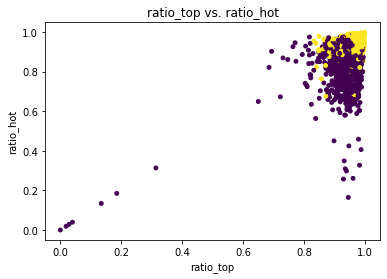

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_top']
y = data2['ratio_hot']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_top vs. ratio_hot")
plt.xlabel("ratio_top")
plt.ylabel("ratio_hot")

Text(0, 0.5, 'ratio_cont')

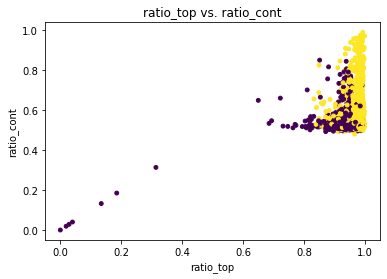

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_top']
y = data2['ratio_cont']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_top vs. ratio_cont")
plt.xlabel("ratio_top")
plt.ylabel("ratio_cont")

Text(0, 0.5, 'ratio_rise')

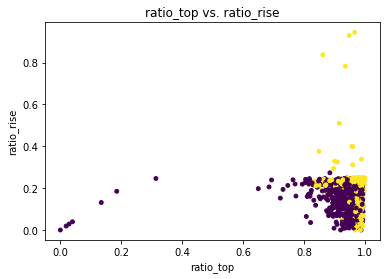

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_top']
y = data2['ratio_rise']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_top vs. ratio_rise")
plt.xlabel("ratio_top")
plt.ylabel("ratio_rise")

Text(0, 0.5, 'user_count')

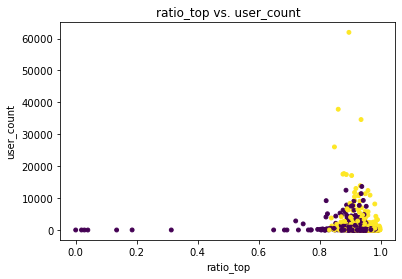

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_top']
y = data2['user_count']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_top vs. user_count")
plt.xlabel("ratio_top")
plt.ylabel("user_count")

Text(0, 0.5, 'ratio_cont')

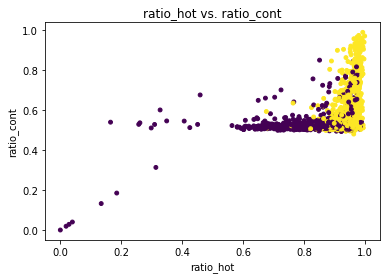

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_hot']
y = data2['ratio_cont']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_hot vs. ratio_cont")
plt.xlabel("ratio_hot")
plt.ylabel("ratio_cont")

Text(0, 0.5, 'ratio_rise')

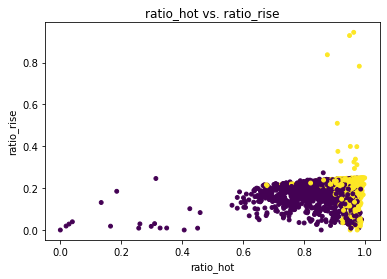

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_hot']
y = data2['ratio_rise']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_hot vs. ratio_rise")
plt.xlabel("ratio_hot")
plt.ylabel("ratio_rise")

Text(0, 0.5, 'user_count')

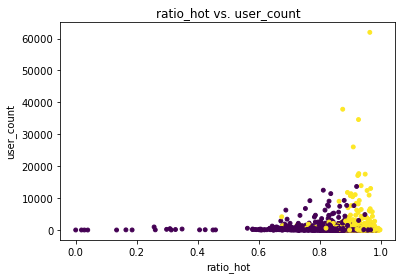

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_hot']
y = data2['user_count']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_hot vs. user_count")
plt.xlabel("ratio_hot")
plt.ylabel("user_count")

Text(0, 0.5, 'user_count')

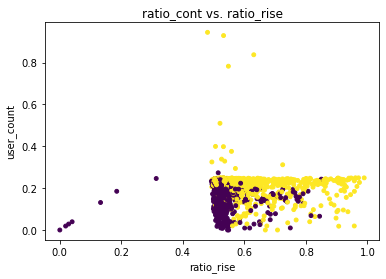

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_cont']
y = data2['ratio_rise']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_cont vs. ratio_rise")
plt.xlabel("ratio_rise")
plt.ylabel("user_count")

Text(0, 0.5, 'user_count')

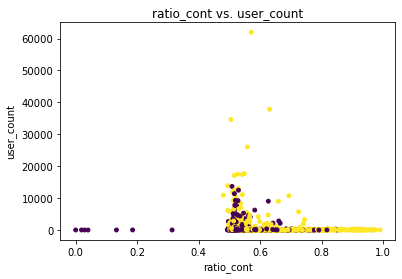

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_cont']
y = data2['user_count']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_cont vs. user_count")
plt.xlabel("ratio_cont")
plt.ylabel("user_count")

Text(0, 0.5, 'user_count')

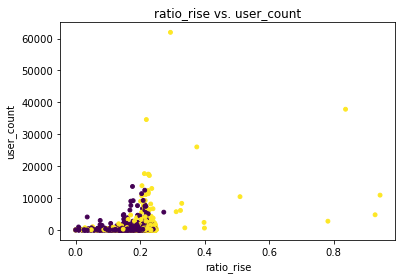

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv("reddit_cleaned.csv")
x = data2['ratio_rise']
y = data2['user_count']
z = data2['target']
plt.scatter(x, y, s=15, c=z, cmap='viridis')
#yellow = 1, purple = 0
plt.title("ratio_rise vs. user_count")
plt.xlabel("ratio_rise")
plt.ylabel("user_count")

In [31]:
#ratio_top & ratio_hot
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_cont','ratio_rise','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.8336633663366336
Precision: 0.7830882352941176
Recall: 0.8949579831932774
F1_Score: 0.8352941176470589


In [8]:
#ratio_top & ratio_cont
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_rise','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7207920792079208
Precision: 0.8384615384615385
Recall: 0.4759825327510917
F1_Score: 0.6072423398328691


In [33]:
#ratio_top & ratio_rise
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_cont','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7861386138613862
Precision: 0.7378277153558053
Recall: 0.8382978723404255
F1_Score: 0.7848605577689244


In [10]:
#ratio_top & user_count
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_cont','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))

Accuracy: 0.7524752475247525
Precision: 0.7341269841269841
Recall: 0.7613168724279835
F1_Score: 0.7474747474747474


In [35]:
#ratio_hot & ratio_cont
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_rise','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7900990099009901
Precision: 0.7803921568627451
Recall: 0.7991967871485943
F1_Score: 0.7896825396825397


In [36]:
#ratio_hot & ratio_rise
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_cont','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.8534653465346534
Precision: 0.8148148148148148
Recall: 0.9016393442622951
F1_Score: 0.8560311284046693


In [4]:
#ratio_hot & user_count
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_cont','ratio_rise','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7960396039603961
Precision: 0.7715355805243446
Recall: 0.8306451612903226
F1_Score: 0.8


In [7]:
#ratio_cont & ratio_rise
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','user_count','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7683168316831683
Precision: 0.8628571428571429
Recall: 0.6188524590163934
F1_Score: 0.720763723150358


In [10]:
#ratio_cont & user_count
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','ratio_rise','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.6633663366336634
Precision: 0.8155339805825242
Recall: 0.3574468085106383
F1_Score: 0.49704142011834324


In [15]:
#ratio_rise & user_count
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','ratio_cont','target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) 

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7049504950495049
Precision: 0.656140350877193
Recall: 0.7857142857142857
F1_Score: 0.7151051625239006


In [19]:
#ratio_top & ratio_hot
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_cont','ratio_rise','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8376237623762376
Precision: 0.8055555555555556
Recall: 0.8601694915254238
F1_Score: 0.8319672131147542


In [20]:
#ratio_top & ratio_cont
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_rise','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.6554455445544555
Precision: 0.8571428571428571
Recall: 0.3076923076923077
F1_Score: 0.45283018867924535


In [21]:
#ratio_top & ratio_rise
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_cont','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7465346534653465
Precision: 0.6936026936026936
Recall: 0.8477366255144033
F1_Score: 0.7629629629629628


In [1]:
#ratio_top & user_count
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_hot','ratio_cont','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7425742574257426
Precision: 0.6833333333333333
Recall: 0.8541666666666666
F1_Score: 0.7592592592592592


In [2]:
#ratio_hot & ratio_cont
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_rise','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.801980198019802
Precision: 0.7218045112781954
Recall: 0.8807339449541285
F1_Score: 0.7933884297520661


In [1]:
#ratio_hot & ratio_rise
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_cont','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8356435643564356
Precision: 0.7725490196078432
Recall: 0.8873873873873874
F1_Score: 0.8259958071278827


In [ ]:
#ratio_hot & user_count
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_cont','ratio_rise','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

In [ ]:
#ratio_cont & ratio_rise
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','user_count','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

In [ ]:
#ratio_cont & user_count
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','ratio_rise','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))

In [ ]:
#ratio_rise & user_count
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("reddit_cleaned.csv")
y = data.target.copy()
x = data.drop(['name','ratio_top','ratio_hot','ratio_cont','target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))